In [1]:
import pandas as pd 
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression, SGDRegressor, RidgeClassifier, SGDClassifier
from sklearn.metrics import r2_score, accuracy_score, f1_score, recall_score, precision_score

from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from lightgbm import LGBMRegressor, LGBMClassifier 

from catboost import CatBoostClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

import joblib

import random

from IPython.display import display

In [2]:
def Score(y_true, y_pred): 
    a = recall_score(y_true, y_pred, zero_division=1)
    b = precision_score(y_true, y_pred, zero_division=1)
    c = f1_score(y_true, y_pred, zero_division=1)
    print(a, b, c)  

In [3]:
data = pd.read_csv(r'C:\gb-credit-default\train.csv', delimiter=',')
data_test = pd.read_csv(r'C:\gb-credit-default\test.csv', delimiter=',')
#data = pd.read_csv(r'C:\titanic\BTC-USD.csv', delimiter=',')
data.head(10)


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
5,Rent,NaN,7 years,0.0,12.0,14.6,366784.0,0.0,NaN,0.0,other,Long Term,337304.0,165680.0,18692.0,NaN,1
6,Home Mortgage,1511108.0,10+ years,0.0,9.0,20.3,388124.0,0.0,73.0,0.0,home improvements,Short Term,99999999.0,51623.0,2317.0,745.0,0
7,Rent,1040060.0,10+ years,0.0,13.0,12.0,330374.0,0.0,18.0,0.0,other,Short Term,250888.0,89015.0,19761.0,705.0,1
8,Home Mortgage,NaN,5 years,0.0,17.0,15.7,0.0,1.0,NaN,1.0,home improvements,Short Term,129734.0,19.0,17.0,NaN,0
9,Home Mortgage,NaN,1 year,0.0,10.0,24.6,511302.0,0.0,6.0,0.0,debt consolidation,Long Term,572880.0,205333.0,17613.0,NaN,1


In [4]:
#X[["Annual Income"]].describe()

In [5]:
data.Term.value_counts(), data["Credit Default"].value_counts(), data["Home Ownership"].value_counts(), data.Purpose.value_counts()

(Short Term    5556
 Long Term     1944
 Name: Term, dtype: int64,
 0    5387
 1    2113
 Name: Credit Default, dtype: int64,
 Home Mortgage    3637
 Rent             3204
 Own Home          647
 Have Mortgage      12
 Name: Home Ownership, dtype: int64,
 debt consolidation      5944
 other                    665
 home improvements        412
 business loan            129
 buy a car                 96
 medical bills             71
 major purchase            40
 take a trip               37
 buy house                 34
 small business            26
 wedding                   15
 moving                    11
 educational expenses      10
 vacation                   8
 renewable energy           2
 Name: Purpose, dtype: int64)

In [6]:
data.columns[0]

'Home Ownership'

In [7]:
data.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [8]:
columns = data.columns
binary_cols = []
for col in columns:
    if data[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
binary_cols

['Term', 'Credit Default']

1. Разведывательный анализ. 
Ищем и находим зависимости. 

In [9]:
data.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [10]:
data[data["Credit Default"]==1].dropna().describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,6.790000e+02,679.000000,679.000000,679.000000,6.790000e+02,679.000000,679.000000,679.000000,679.000000,6.790000e+02,679.000000,679.000000,679.0
mean,1.291526e+06,0.047128,11.702504,18.926951,5.342403e+05,0.194404,34.004418,0.116348,328162.076583,2.405831e+05,19021.051546,2323.509573,1.0
std,6.939190e+05,0.340250,4.654732,6.925501,5.439024e+05,0.559628,21.810967,0.351584,178777.561521,2.120452e+05,11155.778552,2793.527844,0.0
min,2.876790e+05,0.000000,2.000000,5.000000,0.000000e+00,0.000000,0.000000,0.000000,32670.000000,0.000000e+00,57.000000,588.000000,1.0
25%,8.546295e+05,0.000000,9.000000,14.500000,2.365110e+05,0.000000,15.000000,0.000000,196042.000000,1.029800e+05,11498.500000,698.000000,1.0
50%,1.146954e+06,0.000000,11.000000,17.500000,4.078360e+05,0.000000,32.000000,0.000000,300850.000000,1.827040e+05,17242.000000,727.000000,1.0
75%,1.538896e+06,0.000000,14.000000,22.700000,6.860920e+05,0.000000,48.000000,0.000000,443872.000000,3.073630e+05,24218.500000,6085.000000,1.0
max,8.200229e+06,5.000000,32.000000,46.500000,6.639358e+06,5.000000,86.000000,3.000000,788634.000000,2.097353e+06,89789.000000,7510.000000,1.0


In [11]:
data[data["Credit Score"].isnull()][data["Credit Default"]==1].describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,0.0,529.000000,529.000000,529.000000,5.290000e+02,529.000000,250.000000,529.000000,529.000000,5.290000e+02,529.000000,0.0,529.0
mean,NaN,0.060491,11.381853,17.970699,5.965566e+05,0.224953,36.328000,0.132325,339163.519849,2.928782e+05,18995.637051,NaN,1.0
std,NaN,0.389406,4.841203,7.300884,6.086026e+05,0.621933,22.580966,0.350155,189445.398544,3.148293e+05,12239.110354,NaN,0.0
min,NaN,0.000000,2.000000,4.500000,0.000000e+00,0.000000,0.000000,0.000000,21912.000000,0.000000e+00,0.000000,NaN,1.0
25%,NaN,0.000000,8.000000,13.000000,2.542540e+05,0.000000,15.250000,0.000000,201498.000000,1.083000e+05,10858.000000,NaN,1.0
50%,NaN,0.000000,11.000000,16.900000,4.651900e+05,0.000000,34.500000,0.000000,312026.000000,2.164290e+05,16383.000000,NaN,1.0
75%,NaN,0.000000,14.000000,21.500000,7.265720e+05,0.000000,54.000000,0.000000,458854.000000,3.625010e+05,24262.000000,NaN,1.0
max,NaN,4.000000,30.000000,51.500000,6.619316e+06,5.000000,83.000000,2.000000,787644.000000,3.944514e+06,95508.000000,NaN,1.0


In [12]:
data[data["Credit Default"]==0].dropna().describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,1.906000e+03,1906.000000,1906.000000,1906.000000,1.906000e+03,1906.000000,1906.000000,1906.000000,1.906000e+03,1.906000e+03,1906.000000,1906.000000,1906.0
mean,1.515680e+06,0.042497,11.443861,19.209496,8.504658e+05,0.188353,34.838405,0.110178,1.871888e+07,2.663554e+05,18850.145855,720.642183,0.0
std,9.351926e+05,0.361941,4.804334,6.678568,8.806743e+06,0.568362,21.530156,0.342035,3.869486e+07,3.141938e+05,11671.708430,25.765589,0.0
min,1.645970e+05,0.000000,2.000000,4.800000,0.000000e+00,0.000000,0.000000,0.000000,2.171400e+04,0.000000e+00,0.000000,590.000000,0.0
25%,9.438535e+05,0.000000,8.000000,14.500000,2.632190e+05,0.000000,17.000000,0.000000,1.996005e+05,1.040915e+05,10644.500000,709.250000,0.0
50%,1.313052e+06,0.000000,11.000000,17.900000,4.432340e+05,0.000000,32.000000,0.000000,3.285590e+05,1.884515e+05,16874.500000,728.000000,0.0
75%,1.785192e+06,0.000000,14.000000,22.700000,7.241245e+05,0.000000,50.000000,0.000000,6.118310e+05,3.187868e+05,24195.250000,740.000000,0.0
max,1.014934e+07,7.000000,37.000000,50.600000,3.800523e+08,7.000000,118.000000,4.000000,1.000000e+08,4.367245e+06,93640.000000,751.000000,0.0


In [13]:
data[data["Credit Score"].isnull()][data["Credit Default"]==0].describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,0.0,1028.000000,1028.000000,1028.000000,1.028000e+03,1028.000000,433.000000,1026.000000,1028.000000,1.028000e+03,1028.00000,0.0,1028.0
mean,NaN,0.019455,11.033074,18.525097,1.948383e+06,0.143969,33.577367,0.104288,280974.027237,2.825520e+05,18170.89786,NaN,0.0
std,NaN,0.201288,4.981648,6.895782,4.067861e+07,0.421770,21.193643,0.315210,170409.279191,2.997553e+05,11999.81668,NaN,0.0
min,NaN,0.000000,2.000000,4.300000,0.000000e+00,0.000000,0.000000,0.000000,21472.000000,0.000000e+00,0.00000,NaN,0.0
25%,NaN,0.000000,7.000000,13.700000,2.935075e+05,0.000000,15.000000,0.000000,153692.000000,1.144085e+05,9709.75000,NaN,0.0
50%,NaN,0.000000,10.000000,17.500000,4.978930e+05,0.000000,31.000000,0.000000,240999.000000,2.026730e+05,15952.50000,NaN,0.0
75%,NaN,0.000000,14.000000,22.100000,8.336460e+05,0.000000,49.000000,0.000000,368098.500000,3.525878e+05,23617.00000,NaN,0.0
max,NaN,3.000000,33.000000,51.900000,1.304726e+09,3.000000,81.000000,2.000000,788942.000000,3.683340e+06,96177.00000,NaN,0.0


In [14]:
data[data["Credit Score"].isnull()].describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,0.0,1557.000000,1557.000000,1557.000000,1.557000e+03,1557.000000,683.000000,1555.000000,1557.000000,1.557000e+03,1557.000000,0.0,1557.000000
mean,NaN,0.033398,11.151574,18.336737,1.489092e+06,0.171484,34.584187,0.113826,300744.253051,2.860604e+05,18451.107900,NaN,0.339756
std,NaN,0.280313,4.935590,7.038592,3.305621e+07,0.500137,21.735747,0.327673,179179.260062,3.048984e+05,12084.036473,NaN,0.473778
min,NaN,0.000000,2.000000,4.300000,0.000000e+00,0.000000,0.000000,0.000000,21472.000000,0.000000e+00,0.000000,NaN,0.000000
25%,NaN,0.000000,8.000000,13.500000,2.832280e+05,0.000000,15.000000,0.000000,167684.000000,1.140760e+05,10071.000000,NaN,0.000000
50%,NaN,0.000000,10.000000,17.300000,4.862660e+05,0.000000,32.000000,0.000000,262856.000000,2.058650e+05,16048.000000,NaN,0.000000
75%,NaN,0.000000,14.000000,21.900000,7.942660e+05,0.000000,50.000000,0.000000,404096.000000,3.572190e+05,23883.000000,NaN,1.000000
max,NaN,4.000000,33.000000,51.900000,1.304726e+09,5.000000,83.000000,2.000000,788942.000000,3.944514e+06,96177.000000,NaN,1.000000


In [15]:
data[data["Credit Score"].isnull()][data["Credit Default"]==0].describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,0.0,1028.000000,1028.000000,1028.000000,1.028000e+03,1028.000000,433.000000,1026.000000,1028.000000,1.028000e+03,1028.00000,0.0,1028.0
mean,NaN,0.019455,11.033074,18.525097,1.948383e+06,0.143969,33.577367,0.104288,280974.027237,2.825520e+05,18170.89786,NaN,0.0
std,NaN,0.201288,4.981648,6.895782,4.067861e+07,0.421770,21.193643,0.315210,170409.279191,2.997553e+05,11999.81668,NaN,0.0
min,NaN,0.000000,2.000000,4.300000,0.000000e+00,0.000000,0.000000,0.000000,21472.000000,0.000000e+00,0.00000,NaN,0.0
25%,NaN,0.000000,7.000000,13.700000,2.935075e+05,0.000000,15.000000,0.000000,153692.000000,1.144085e+05,9709.75000,NaN,0.0
50%,NaN,0.000000,10.000000,17.500000,4.978930e+05,0.000000,31.000000,0.000000,240999.000000,2.026730e+05,15952.50000,NaN,0.0
75%,NaN,0.000000,14.000000,22.100000,8.336460e+05,0.000000,49.000000,0.000000,368098.500000,3.525878e+05,23617.00000,NaN,0.0
max,NaN,3.000000,33.000000,51.900000,1.304726e+09,3.000000,81.000000,2.000000,788942.000000,3.683340e+06,96177.00000,NaN,0.0


In [16]:
data[data["Credit Score"].isnull()][data["Credit Default"]==1].describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,0.0,529.000000,529.000000,529.000000,5.290000e+02,529.000000,250.000000,529.000000,529.000000,5.290000e+02,529.000000,0.0,529.0
mean,NaN,0.060491,11.381853,17.970699,5.965566e+05,0.224953,36.328000,0.132325,339163.519849,2.928782e+05,18995.637051,NaN,1.0
std,NaN,0.389406,4.841203,7.300884,6.086026e+05,0.621933,22.580966,0.350155,189445.398544,3.148293e+05,12239.110354,NaN,0.0
min,NaN,0.000000,2.000000,4.500000,0.000000e+00,0.000000,0.000000,0.000000,21912.000000,0.000000e+00,0.000000,NaN,1.0
25%,NaN,0.000000,8.000000,13.000000,2.542540e+05,0.000000,15.250000,0.000000,201498.000000,1.083000e+05,10858.000000,NaN,1.0
50%,NaN,0.000000,11.000000,16.900000,4.651900e+05,0.000000,34.500000,0.000000,312026.000000,2.164290e+05,16383.000000,NaN,1.0
75%,NaN,0.000000,14.000000,21.500000,7.265720e+05,0.000000,54.000000,0.000000,458854.000000,3.625010e+05,24262.000000,NaN,1.0
max,NaN,4.000000,30.000000,51.500000,6.619316e+06,5.000000,83.000000,2.000000,787644.000000,3.944514e+06,95508.000000,NaN,1.0


In [17]:
data[data["Maximum Open Credit"]>6600000][data["Credit Score"].isnull()][data["Credit Default"]==0]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
617,Home Mortgage,NaN,3 years,0.0,13.0,27.5,1.304726e+09,0.0,NaN,0.0,debt consolidation,Short Term,529892.0,1126814.0,5492.0,NaN,0
1476,Own Home,NaN,8 years,0.0,14.0,28.9,1.042866e+07,0.0,NaN,0.0,debt consolidation,Short Term,656766.0,1089802.0,16531.0,NaN,0
6265,Home Mortgage,NaN,10+ years,0.0,13.0,22.8,9.167356e+06,0.0,41.0,0.0,home improvements,Short Term,769384.0,2240594.0,69413.0,NaN,0


In [18]:
data[data["Maximum Open Credit"]>6600000][data["Credit Score"].isnull()][data["Credit Default"]==1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
3316,Home Mortgage,NaN,9 years,0.0,17.0,28.4,6619316.0,0.0,NaN,0.0,debt consolidation,Long Term,522874.0,3944514.0,65905.0,NaN,1


In [19]:
data_test[data_test["Maximum Open Credit"]>6600000][data_test["Credit Score"].isnull()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
2152,Home Mortgage,NaN,10+ years,0.0,16.0,32.3,20842404.0,0.0,NaN,0.0,debt consolidation,Short Term,612502.0,6030087.0,75206.0,NaN


In [20]:
data[data["Monthly Debt"]==0].describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,3.000000e+00,6.0,6.000000,6.000000,6.0,6.0,4.000000,5.0,6.000000e+00,6.0,6.0,3.000000,6.000000
mean,7.852763e+05,0.0,4.166667,15.183333,0.0,0.0,44.000000,0.0,1.680515e+07,0.0,0.0,732.666667,0.166667
std,5.154454e+05,0.0,1.940790,5.229691,0.0,0.0,30.066593,0.0,4.075710e+07,0.0,0.0,24.846194,0.408248
min,2.335670e+05,0.0,2.000000,10.000000,0.0,0.0,0.000000,0.0,7.535000e+04,0.0,0.0,704.000000,0.000000
25%,5.506580e+05,0.0,3.000000,11.175000,0.0,0.0,37.500000,0.0,9.290600e+04,0.0,0.0,725.000000,0.000000
50%,8.677490e+05,0.0,3.500000,14.100000,0.0,0.0,55.000000,0.0,1.720950e+05,0.0,0.0,746.000000,0.000000
75%,1.061131e+06,0.0,5.500000,18.000000,0.0,0.0,61.500000,0.0,3.016585e+05,0.0,0.0,747.000000,0.000000
max,1.254513e+06,0.0,7.000000,23.400000,0.0,0.0,66.000000,0.0,1.000000e+08,0.0,0.0,748.000000,1.000000


In [21]:
data_test.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,1.987000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,1142.000000,2497.000000,2.500000e+03,2.500000e+03,2500.000000,1987.000000
mean,1.366922e+06,0.035200,11.184400,18.325920,7.105704e+05,0.162000,34.181261,0.106928,1.215572e+07,2.963966e+05,18271.340000,1234.516860
std,9.171252e+05,0.386291,4.852774,7.254659,1.511983e+06,0.559894,22.024277,0.357189,3.226097e+07,3.783020e+05,11543.881469,1740.219442
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.000000
25%,8.523115e+05,0.000000,8.000000,13.400000,2.785860e+05,0.000000,16.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,710.000000
50%,1.178475e+06,0.000000,10.000000,17.000000,4.786760e+05,0.000000,30.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,731.000000
75%,1.629734e+06,0.000000,14.000000,22.100000,8.025985e+05,0.000000,50.000000,0.000000,5.225825e+05,3.663485e+05,24146.000000,743.000000
max,1.497561e+07,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,1.000000e+08,6.030087e+06,93555.000000,7480.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [23]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [24]:
c = data.corr(method="pearson")
# pd.options.display.max_columns = None
# display(c)

In [25]:
#X_test.corr(method="spearman")

In [26]:
#X.corr(method="pearson")

In [27]:
print(data.var()), print(data_test.var())

Annual Income                   7.145984e+11
Tax Liens                       7.376848e-02
Number of Open Accounts         2.409754e+01
Years of Credit History         4.958900e+01
Maximum Open Credit             2.568396e+14
Number of Credit Problems       2.485998e-01
Months since last delinquent    4.704043e+02
Bankruptcies                    1.205421e-01
Current Loan Amount             1.019277e+15
Current Credit Balance          1.010422e+11
Monthly Debt                    1.422477e+08
Credit Score                    2.574264e+06
Credit Default                  2.023866e-01
dtype: float64
Annual Income                   8.411185e+11
Tax Liens                       1.492206e-01
Number of Open Accounts         2.354942e+01
Years of Credit History         5.263008e+01
Maximum Open Credit             2.286094e+12
Number of Credit Problems       3.134814e-01
Months since last delinquent    4.850688e+02
Bankruptcies                    1.275842e-01
Current Loan Amount             1.040770

(None, None)

In [28]:
data[["Credit Default", "Credit Score", "Current Loan Amount"]].corr(method="pearson")


,Credit Default,Credit Score,Current Loan Amount
Credit Default,1.000000,0.442050,-0.226522
Credit Score,0.442050,1.000000,-0.108552
Current Loan Amount,-0.226522,-0.108552,1.000000


In [29]:
data["Credit Score"].isnull().value_counts()

False    5943
True     1557
Name: Credit Score, dtype: int64

In [30]:
data[data["Credit Score"].isnull()][data["Credit Default"]==1].count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Home Ownership                  529
Annual Income                     0
Years in current job            493
Tax Liens                       529
Number of Open Accounts         529
Years of Credit History         529
Maximum Open Credit             529
Number of Credit Problems       529
Months since last delinquent    250
Bankruptcies                    529
Purpose                         529
Term                            529
Current Loan Amount             529
Current Credit Balance          529
Monthly Debt                    529
Credit Score                      0
Credit Default                  529
dtype: int64

In [31]:
data[data["Credit Score"].isnull()].count()

Home Ownership                  1557
Annual Income                      0
Years in current job            1482
Tax Liens                       1557
Number of Open Accounts         1557
Years of Credit History         1557
Maximum Open Credit             1557
Number of Credit Problems       1557
Months since last delinquent     683
Bankruptcies                    1555
Purpose                         1557
Term                            1557
Current Loan Amount             1557
Current Credit Balance          1557
Monthly Debt                    1557
Credit Score                       0
Credit Default                  1557
dtype: int64

In [32]:
data[['Purpose','Credit Default']].groupby(['Purpose']).sum()

,Credit Default
Purpose,
business loan,55
buy a car,24
buy house,9
debt consolidation,1654
educational expenses,1
home improvements,108
major purchase,9
medical bills,22
moving,2


In [33]:
data[['Number of Credit Problems','Credit Default']].groupby(['Number of Credit Problems']).count()

,Credit Default
Number of Credit Problems,
0.0,6469
1.0,882
2.0,93
3.0,35
4.0,9
5.0,7
6.0,4
7.0,1


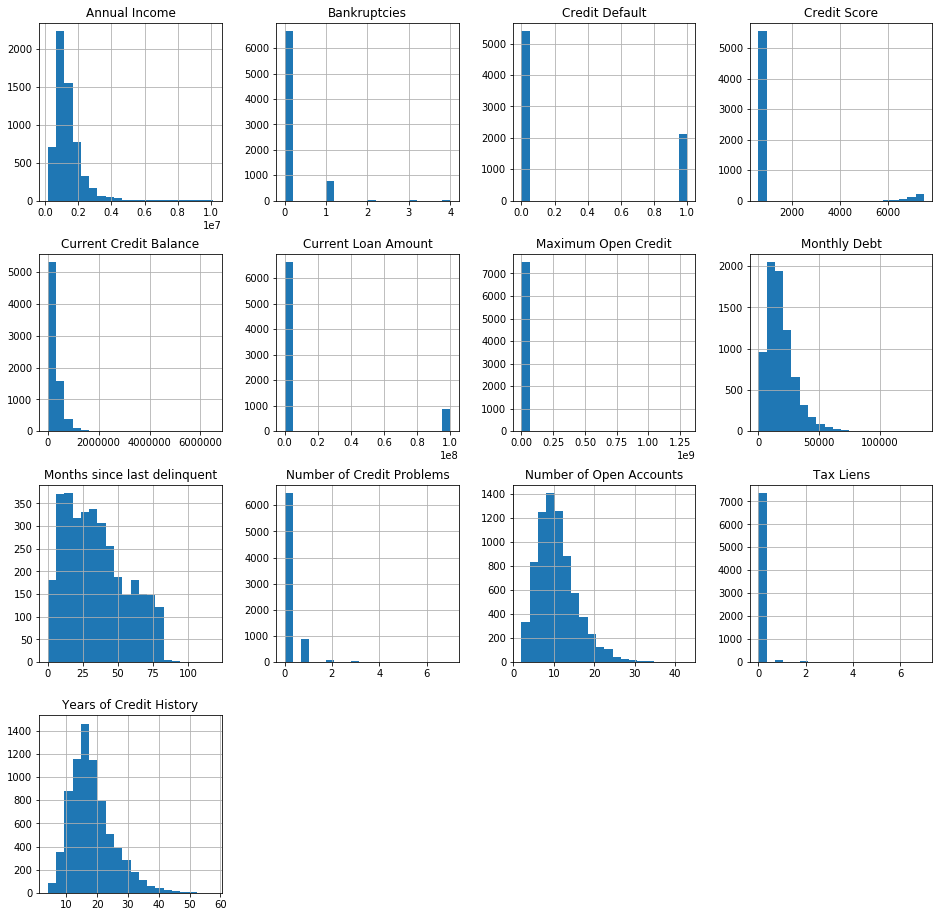

In [34]:
data.hist(bins = 20, figsize = (16, 16))
plt.show()

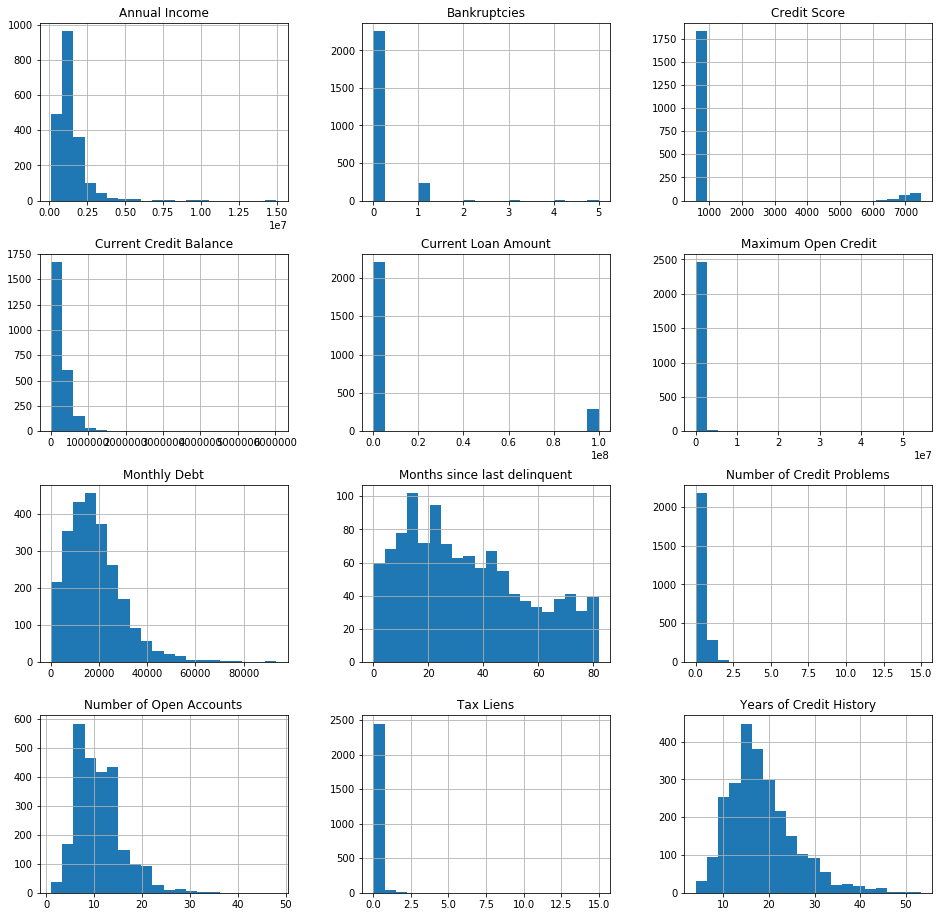

In [35]:
data_test.hist(bins = 20, figsize = (16, 16))
plt.show()

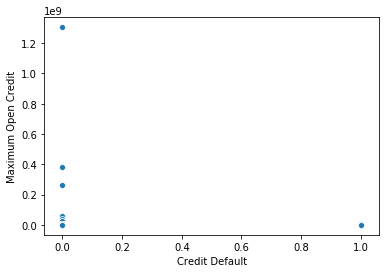

In [36]:
sns.scatterplot(data=data, x="Credit Default", y="Maximum Open Credit")

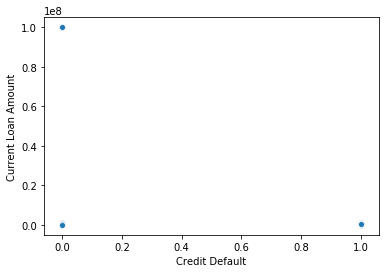

In [37]:
sns.scatterplot(data=data, x="Credit Default", y="Current Loan Amount")

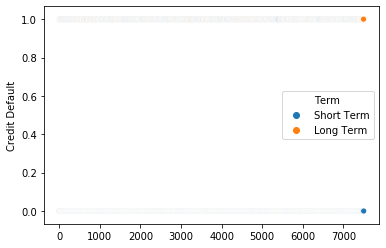

In [38]:
sns.scatterplot(data=data, x=range(len(data.Purpose)), y="Credit Default", hue="Term")

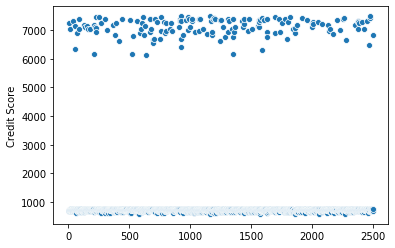

In [39]:
sns.scatterplot(data=data_test, x=range(len(data_test.Purpose)), y="Credit Score")

In [40]:
#data['Number of Open Accounts'].value_counts(0)

In [41]:
n = 20
apl = data['Number of Open Accounts'][data["Credit Default"]==1]
cpl = data['Number of Open Accounts'][data["Credit Default"]==0]
print(data['Number of Open Accounts'][data["Number of Open Accounts"]>n][data["Credit Default"]==1].shape)
print(data['Number of Open Accounts'][data["Number of Open Accounts"]>n][data["Credit Default"]==0].shape)

(101,)
(255,)


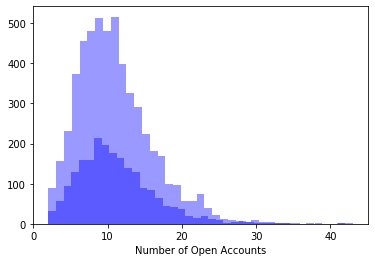

In [42]:

sns.distplot(apl, kde = False, color ='blue', bins = 39)
sns.distplot(cpl, kde = False, color ='blue', bins = 39)
#sns.distplot(data['Number of Open Accounts'], kde = False, color ='blue', bins = 39)

In [43]:
data['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

In [44]:
n = 6
print(data['Number of Credit Problems'][data["Number of Credit Problems"]==n][data["Credit Default"]==1].shape)
print(data['Number of Credit Problems'][data["Number of Credit Problems"]==n][data["Credit Default"]==0].shape)


(0,)
(4,)


In [45]:
n = 5
print(data_test['Number of Credit Problems'][data_test["Number of Credit Problems"]>n].shape)


(2,)


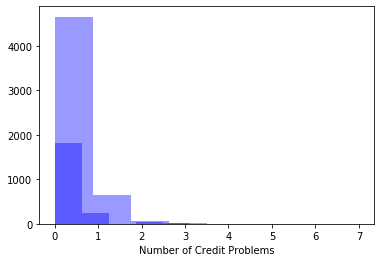

In [46]:
sns.distplot(data['Number of Credit Problems'][data["Credit Default"]==1], kde = False, color ='blue', bins = 8)
sns.distplot(data['Number of Credit Problems'][data["Credit Default"]==0], kde = False, color ='blue', bins = 8)

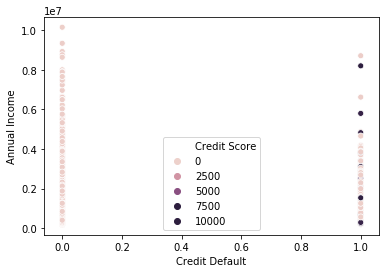

In [47]:
sns.scatterplot(data=data, x="Credit Default", y="Annual Income", hue="Credit Score")

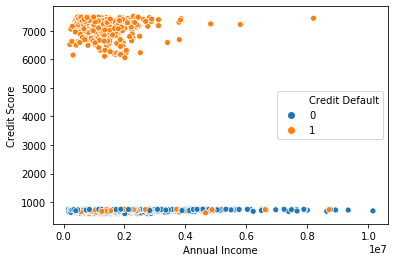

In [48]:
sns.scatterplot(data=data, x="Annual Income", y="Credit Score", hue="Credit Default")

In [49]:
# 1584   /    4359
val = 700000
print(data[data["Annual Income"]>val][data["Credit Default"]==1].shape)
print(data[data["Annual Income"]>val][data["Credit Default"]==0].shape)

print(data[data["Annual Income"]<=val][data["Credit Default"]==1].shape)
print(data[data["Annual Income"]<=val][data["Credit Default"]==0].shape)


(1295, 17)
(3790, 17)
(289, 17)
(569, 17)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


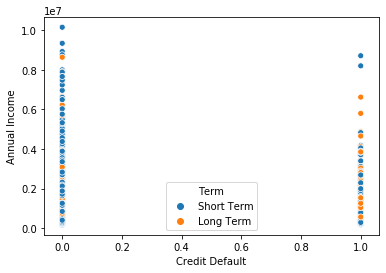

In [50]:
sns.scatterplot(data=data, x="Credit Default", y="Annual Income", hue="Term")

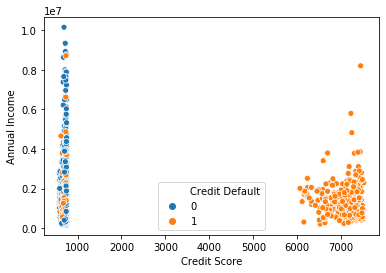

In [51]:
sns.scatterplot(data=data, x="Credit Score", y="Annual Income", hue="Credit Default")

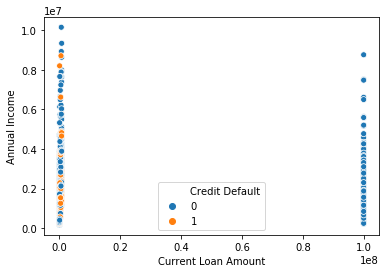

In [52]:
sns.scatterplot(data=data, x="Current Loan Amount", y="Annual Income", hue="Credit Default")

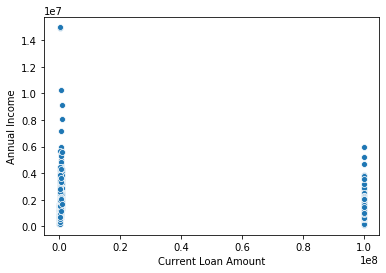

In [53]:
sns.scatterplot(data=data_test, x="Current Loan Amount", y="Annual Income")

Нашли выбросы по Current Loan Amount и Credit Score

In [54]:
# 1584   /    4359
val = 789500
print(data[data["Current Loan Amount"]>val][data["Credit Default"]==1].shape)
print(data[["Current Loan Amount"]][data["Current Loan Amount"]>val][data["Credit Default"]==0])

print(data[data["Current Loan Amount"]<=val][data["Credit Default"]==1].shape)
print(data[data["Current Loan Amount"]<=val][data["Credit Default"]==0].shape)
#data[data["Current Loan Amount"]>789500] = None
#data_test[data_test["Current Loan Amount"]>789500] = None

(0, 17)
      Current Loan Amount
0              99999999.0
2              99999999.0
6              99999999.0
22             99999999.0
27             99999999.0
...                   ...
7441           99999999.0
7445           99999999.0
7464           99999999.0
7475           99999999.0
7497           99999999.0

[870 rows x 1 columns]
(2113, 17)
(4517, 17)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [55]:
data["Credit Score"].isnull().sum(), data_test["Credit Score"].value_counts().sum()

(1557, 1987)

In [56]:
data_test["Credit Score"][data_test["Credit Score"]>1000].value_counts().sum()

160

In [57]:
data[["Credit Score", "Maximum Open Credit"]][data["Maximum Open Credit"]>1000000][data["Credit Default"]==1].max()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Credit Score              7510.0
Maximum Open Credit    6639358.0
dtype: float64

In [58]:
data[["Credit Score", "Maximum Open Credit"]][data["Maximum Open Credit"]>8000000][data["Credit Default"]==0].min()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Credit Score               687.0
Maximum Open Credit    8706038.0
dtype: float64

Индексируем выбросы в списки.

In [59]:
credit_list = []
for i in range(len(data_test["Maximum Open Credit"])):
    if data_test["Maximum Open Credit"][i] > 8500000:
        credit_list.append(i)
credit_list

[222, 228, 584, 1455, 1568, 2152]

In [60]:
score_list = []
for i in range(0, len(data_test["Credit Score"])):
    if data_test["Credit Score"][i]>1000:
        score_list.append(i)
len(score_list), len(data_test["Credit Score"])

(160, 2500)

In [61]:
loan_list = []
for i in range(0, len(data_test["Current Loan Amount"])):
    if data_test["Current Loan Amount"][i]>789500:
        loan_list.append(i)
len(loan_list)

297

In [62]:
loan_list = []
score_list = []
credit_list = []
for i in range(len(data_test["Maximum Open Credit"])):
    if data_test["Maximum Open Credit"][i] > 8500000:
        credit_list.append(i)

for i in range(0, len(data_test["Credit Score"])):
    if data_test["Credit Score"][i]>1000:
        score_list.append(i)
len(score_list), len(data_test["Credit Score"])

for i in range(0, len(data_test["Current Loan Amount"])):
    if data_test["Current Loan Amount"][i]>789500:
        loan_list.append(i)
len(loan_list)

297

Ищем зависимости для пропущенных значений тестовой выборки, рассатривая связь данных трейн сета и Credit Default, в надежде что сможем лучше заполнить пропуски в тест сете.

In [63]:
data[data["Credit Score"].isnull()][data["Credit Default"] == 1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
5,Rent,NaN,7 years,0.0,12.0,14.6,366784.0,0.0,NaN,0.0,other,Long Term,337304.0,165680.0,18692.0,NaN,1
9,Home Mortgage,NaN,1 year,0.0,10.0,24.6,511302.0,0.0,6.0,0.0,debt consolidation,Long Term,572880.0,205333.0,17613.0,NaN,1
16,Rent,NaN,7 years,0.0,6.0,17.8,899492.0,0.0,NaN,0.0,debt consolidation,Long Term,313038.0,538346.0,18844.0,NaN,1
23,Own Home,NaN,10+ years,0.0,17.0,14.8,700040.0,0.0,17.0,0.0,debt consolidation,Short Term,174878.0,168074.0,17132.0,NaN,1
29,Rent,NaN,10+ years,0.0,9.0,18.6,186494.0,0.0,6.0,0.0,debt consolidation,Short Term,357918.0,72808.0,22352.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,Home Mortgage,NaN,10+ years,0.0,21.0,16.2,2468026.0,0.0,NaN,0.0,debt consolidation,Short Term,400004.0,1157385.0,42990.0,NaN,1
7417,Home Mortgage,NaN,4 years,0.0,18.0,16.0,625922.0,0.0,76.0,0.0,debt consolidation,Long Term,562848.0,480035.0,37093.0,NaN,1
7428,Own Home,NaN,< 1 year,0.0,9.0,18.9,234212.0,0.0,NaN,0.0,debt consolidation,Short Term,133320.0,114076.0,3306.0,NaN,1
7451,Rent,NaN,7 years,0.0,6.0,8.0,137544.0,0.0,10.0,0.0,take a trip,Short Term,225368.0,81966.0,12205.0,NaN,1


In [64]:
data[data["Annual Income"].isnull()][data["Credit Score"].isnull()].shape, data[data["Credit Score"].isnull()].shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


((1557, 17), (1557, 17))

In [65]:
data[data["Credit Score"]>1000][data["Credit Default"] == 1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
69,Home Mortgage,1408527.0,2 years,0.0,12.0,17.5,700062.0,0.0,21.0,0.0,other,Long Term,525998.0,174135.0,9320.0,6470.0,1
87,Home Mortgage,1533566.0,7 years,0.0,11.0,14.8,715462.0,0.0,19.0,0.0,debt consolidation,Short Term,210826.0,285475.0,18147.0,7440.0,1
94,Rent,1049294.0,3 years,0.0,5.0,6.1,249810.0,0.0,NaN,0.0,business loan,Short Term,337502.0,119529.0,15215.0,7010.0,1
96,Rent,757568.0,5 years,0.0,13.0,11.4,383548.0,0.0,NaN,0.0,debt consolidation,Short Term,210518.0,276583.0,11553.0,7320.0,1
116,Home Mortgage,1039984.0,NaN,0.0,10.0,23.8,147950.0,0.0,63.0,0.0,debt consolidation,Short Term,224246.0,95456.0,13780.0,7390.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422,Rent,694868.0,1 year,0.0,4.0,7.8,143066.0,0.0,NaN,0.0,debt consolidation,Long Term,244178.0,122075.0,4268.0,6690.0,1
7433,Rent,2011758.0,< 1 year,0.0,4.0,14.9,22176.0,0.0,43.0,0.0,buy a car,Long Term,106480.0,18791.0,12590.0,6060.0,1
7450,Home Mortgage,1432277.0,10+ years,0.0,16.0,22.8,825176.0,0.0,NaN,0.0,debt consolidation,Short Term,187924.0,458242.0,27094.0,7290.0,1
7460,Rent,769462.0,5 years,0.0,8.0,17.0,313786.0,0.0,80.0,0.0,debt consolidation,Short Term,109186.0,45524.0,4585.0,7470.0,1


In [66]:
data[data["Credit Score"]<1000][data["Credit Default"] == 1].shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(1184, 17)

In [67]:
data[data["Credit Score"]>1000][data["Credit Default"] == 1].shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(400, 17)

In [68]:
data[["Number of Open Accounts", "Credit Default"]].groupby(["Credit Default"]).mean(), data[["Annual Income", "Credit Default"]].groupby(["Credit Default"]).median(), data[["Bankruptcies", "Credit Default"]].groupby(["Credit Default"]).mean(), data[["Credit Score", "Credit Default"]].groupby(["Credit Default"]).mean()

(                Number of Open Accounts
 Credit Default                         
 0                             11.042138
 1                             11.357312,
                 Annual Income
 Credit Default               
 0                   1225747.0
 1                   1055915.5,
                 Bankruptcies
 Credit Default              
 0                   0.116794
 1                   0.118065,
                 Credit Score
 Credit Default              
 0                 723.577885
 1                2327.548611)

In [69]:
data["Home Ownership"].value_counts(), data["Years in current job"].value_counts()

(Home Mortgage    3637
 Rent             3204
 Own Home          647
 Have Mortgage      12
 Name: Home Ownership, dtype: int64,
 10+ years    2332
 2 years       705
 3 years       620
 < 1 year      563
 5 years       516
 1 year        504
 4 years       469
 6 years       426
 7 years       396
 8 years       339
 9 years       259
 Name: Years in current job, dtype: int64)

In [70]:
data[["Home Ownership", "Credit Default"]].groupby(["Home Ownership"]).sum()

,Credit Default
Home Ownership,
Have Mortgage,2
Home Mortgage,916
Own Home,192
Rent,1003


In [71]:
data[["Home Ownership", "Credit Default"]].groupby(["Home Ownership"]).count()

,Credit Default
Home Ownership,
Have Mortgage,12
Home Mortgage,3637
Own Home,647
Rent,3204


In [72]:
print(data[["Term", "Credit Default"]].groupby(["Term"]).sum())
print(data[["Term", "Credit Default"]].groupby(["Term"]).count())

            Credit Default
Term                      
Long Term              816
Short Term            1297
            Credit Default
Term                      
Long Term             1944
Short Term            5556


In [73]:
data[["Years in current job", "Credit Default"]].groupby(["Years in current job"]).sum()

,Credit Default
Years in current job,
1 year,142
10+ years,644
2 years,193
3 years,170
4 years,131
5 years,145
6 years,124
7 years,111
8 years,92


In [74]:
data[["Years in current job", "Credit Default"]].groupby(["Years in current job"]).count()

,Credit Default
Years in current job,
1 year,504
10+ years,2332
2 years,705
3 years,620
4 years,469
5 years,516
6 years,426
7 years,396
8 years,339


In [75]:
data["Purpose"].value_counts(), data["Term"].value_counts()

(debt consolidation      5944
 other                    665
 home improvements        412
 business loan            129
 buy a car                 96
 medical bills             71
 major purchase            40
 take a trip               37
 buy house                 34
 small business            26
 wedding                   15
 moving                    11
 educational expenses      10
 vacation                   8
 renewable energy           2
 Name: Purpose, dtype: int64,
 Short Term    5556
 Long Term     1944
 Name: Term, dtype: int64)

In [76]:
data[["Purpose", "Credit Default"]].groupby(["Purpose"]).sum()

,Credit Default
Purpose,
business loan,55
buy a car,24
buy house,9
debt consolidation,1654
educational expenses,1
home improvements,108
major purchase,9
medical bills,22
moving,2


In [77]:
data[["Term", "Credit Default"]].groupby(["Term"]).sum()

,Credit Default
Term,
Long Term,816
Short Term,1297


In [78]:
data.Term

0       Short Term
1        Long Term
2       Short Term
3       Short Term
4       Short Term
           ...    
7495    Short Term
7496     Long Term
7497    Short Term
7498    Short Term
7499    Short Term
Name: Term, Length: 7500, dtype: object

Ищем кореляцию по пирсоны и спирману. 

In [79]:
data.corr('pearson')

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Annual Income,1.000000,0.066245,0.188524,0.186531,0.062218,-0.015407,-0.101787,-0.066877,0.032082,0.386481,0.584819,-0.037832,-0.101375
Tax Liens,0.066245,1.000000,-0.005360,0.009109,-0.002410,0.595339,0.052446,0.057360,-0.007835,-0.010195,0.027211,0.010581,0.024368
Number of Open Accounts,0.188524,-0.005360,1.000000,0.144819,0.023897,-0.017813,-0.032740,-0.019130,0.001346,0.267325,0.413904,0.016095,0.028884
Years of Credit History,0.186531,0.009109,0.144819,1.000000,0.029247,0.071259,-0.015375,0.085699,0.010623,0.217856,0.191978,-0.015683,-0.020567
Maximum Open Credit,0.062218,-0.002410,0.023897,0.029247,1.000000,-0.004750,-0.003849,-0.011650,-0.002334,0.088090,0.010197,-0.009136,-0.014275
Number of Credit Problems,-0.015407,0.595339,-0.017813,0.071259,-0.004750,1.000000,0.139905,0.730751,-0.008596,-0.124137,-0.042252,-0.018473,0.020088
Months since last delinquent,-0.101787,0.052446,-0.032740,-0.015375,-0.003849,0.139905,1.000000,0.162710,0.000459,-0.027198,-0.057702,-0.004395,0.002598
Bankruptcies,-0.066877,0.057360,-0.019130,0.085699,-0.011650,0.730751,0.162710,1.000000,-0.005987,-0.142849,-0.079579,-0.027488,0.001648
Current Loan Amount,0.032082,-0.007835,0.001346,0.010623,-0.002334,-0.008596,0.000459,-0.005987,1.000000,0.016672,-0.009382,-0.108552,-0.226522
Current Credit Balance,0.386481,-0.010195,0.267325,0.217856,0.088090,-0.124137,-0.027198,-0.142849,0.016672,1.000000,0.504964,-0.006159,-0.019522


Начинаем проверять разные способы обработки категорийных данных.
И масштабирование numerical continuos данных 

In [80]:
scale_mapper = {"< 1 year":0, "1 year":1, "2 years":2, "3 years":3, "4 years":4, "5 years":5, "6 years":6, "7 years":7, "8 years":8,"9 years":9,"10+ years":10,}
data["Years in current job"] = data["Years in current job"].replace(scale_mapper)
data_test["Years in current job"] = data_test["Years in current job"].replace(scale_mapper)

In [81]:
#data.Term = data.Term.replace({'Short Term':0, "Long Term": 1})

term = pd.get_dummies(data['Term'])
data = data.join(term)

term_test = pd.get_dummies(data_test['Term'])
data_test = data_test.join(term_test)

ownership = pd.get_dummies(data['Home Ownership'])
data = data.join(ownership)

ownership = pd.get_dummies(data_test['Home Ownership'])
data_test = data_test.join(ownership)

purpose = pd.get_dummies(data['Purpose'])
data = data.join(purpose)

purpose = pd.get_dummies(data_test['Purpose'])
data_test = data_test.join(purpose)

In [82]:
sc = MinMaxScaler()
a = sc.fit_transform(data[['Annual Income']])
b = sc.fit_transform(data[['Current Loan Amount']])
c = sc.fit_transform(data[['Credit Score']])
data['Annual Income'] = a
data['Current Loan Amount'] = b
data['Credit Score'] = c

a = sc.fit_transform(data_test[['Annual Income']])
b = sc.fit_transform(data_test[['Current Loan Amount']])
c = sc.fit_transform(data_test[['Credit Score']])
data_test['Annual Income'] = a
data_test['Current Loan Amount'] = b
data_test['Credit Score'] = c


#data_test["Credit Score"]= data_test["Credit Score"].fillna(data_test["Credit Score"].median())


In [83]:
data.Purpose.value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [84]:
ownership = ["Have Mortgage", "Home Mortgage", "Own Home", "Rent"]
purpose = ['debt consolidation', 'other', 'home improvements', 'business loan', 'buy a car', 'medical bills', 'major purchase', 'take a trip', 'buy house', 'small business', 'wedding', 'moving', 'educational expenses', 'vacation', 'renewable energy'] 
purpose_test = ['debt consolidation', 'other', 'home improvements', 'business loan', 'buy a car', 'medical bills', 'major purchase', 'take a trip', 'buy house', 'small business', 'wedding', 'moving', 'educational expenses', 'vacation']

term = ["Short Term", "Long Term"]
#train_data = ["Annual Income", "Current Loan Amount", "Credit Score"]
#train_data = ["Annual Income", "Current Loan Amount", 'Years in current job']
train_data = ["Annual Income", "Current Loan Amount"]
credit_score = ["Credit Score"]
#term = ["Term"]

credit = ["Credit Default"]
annual = ['Annual Income']


In [85]:

loan_val = []
score_val = []
credit_val = []
for i in range(len(data["Maximum Open Credit"])):
    if data["Maximum Open Credit"][i] > 8500000:
        credit_val.append(data["Maximum Open Credit"].iloc())

for i in range(0, len(data["Credit Score"])):
    if data["Credit Score"][i]>1000:
        score_val.append(i)
len(score_list), len(data_test["Credit Score"])

for i in range(0, len(data["Current Loan Amount"])):
    if data["Current Loan Amount"][i]>789500:
        loan_val.append(i)
len(loan_list)

297

In [86]:
# print(data[["Annual Income"]][data["Credit Default"]==0].describe())
# print(data[["Annual Income"]][data["Credit Default"]==1].describe())
# print(data[["Credit Score"]][data["Credit Default"]==0].describe())
# print(data[["Credit Score"]][data["Credit Default"]==1].describe())

# print(data_test[["Annual Income"]].describe())
# print(data_test[["Credit Score"]].describe())

In [87]:
# value0 = data[["Annual Income"]][data["Credit Default"]==0].median()
# print(value0)
# value1 = data[["Annual Income"]][data["Credit Default"]==1].median()
# print(value1)
# value2 = data[["Credit Score"]][data["Credit Default"]==0].median()
# print(value2)
# value3 = data[["Credit Score"]][data["Credit Default"]==1].mean()
# print(value3)
# #value3 = 7000

Ниже разные варианты заполнения пропущенных данных, медианное/средние значения, нормальное распределение интерквантильного размаза признака, Iterative imputer 

In [88]:
# for i in range(len(data["Credit Default"])):
#     if data["Credit Default"][i] == 0 and np.isnan(data["Annual Income"][i]):
#         data["Annual Income"][i] = value0

#     elif data["Credit Default"][i] == 1 and np.isnan(data["Annual Income"][i]):
#         data["Annual Income"][i] = value1

# for i in range(len(data["Credit Default"])):
#     if data["Credit Default"][i] == 0 and np.isnan(data["Credit Score"][i]):
#         data["Credit Score"][i] = value2

#     elif data["Credit Default"][i] == 1 and np.isnan(data["Credit Score"][i]):
#         data["Credit Score"][i] = value3    


# for i in range(len(data["Credit Default"])):
#     if data["Credit Default"][i] == 0 and np.isnan(data["Annual Income"][i]):
#         data["Annual Income"][i] = np.random.randint(9.494775e+05, 1.551236e+06)

#     elif data["Credit Default"][i] == 1 and np.isnan(data["Annual Income"][i]):
#         data["Annual Income"][i] = np.random.randint(8.689460e+05, 1.355832e+06)

# for i in range(len(data["Credit Default"])):
#     if data["Credit Default"][i] == 0 and np.isnan(data["Credit Score"][i]):
#         data["Credit Score"][i] = np.random.randint(713, 742)

#     elif data["Credit Default"][i] == 1 and np.isnan(data["Credit Score"][i]):
#         data["Credit Score"][i] = np.random.randint(704, 6162)


In [89]:
data["Credit Default"][0]
data["Annual Income"].isnull().sum(), data["Credit Score"].isnull().sum()

(1557, 1557)

In [90]:
imp = IterativeImputer()
#data[train_data] = pd.DataFrame(imp.fit_transform(data[train_data]), columns=data[train_data].columns)
#data[credit_score] = pd.DataFrame(imp.fit_transform(data[credit_score]), columns=data[credit_score].columns)
#data[ownership+purpose+term+train_data] = pd.DataFrame(imp.fit_transform(data[ownership+purpose+term+train_data]), columns=data[ownership+purpose+term+train_data].columns)

data_test[train_data] = pd.DataFrame(imp.fit_transform(data_test[train_data]), columns=data_test[train_data].columns)
#data_test[ownership+purpose_test+term+train_data] = pd.DataFrame(imp.fit_transform(data_test[ownership+purpose_test+term+train_data]), columns=data_test[ownership+purpose_test+term+train_data].columns)
data_test[credit_score] = pd.DataFrame(imp.fit_transform(data_test[credit_score]), columns=data_test[credit_score].columns)

Разделям датасеты 

In [91]:
#data = data.dropna(axis=0)
#X = data[["Tax Liens", "Number of Open Accounts", 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', "Credit Default"]]

X=  data[train_data+credit_score + credit+term]
#X["Annual Income"] = X["Annual Income"].dropna()
#X["Credit Score"] = X["Credit Score"].dropna()

#ANN = np.asarray([data[["Annual Income"]][data["Credit Default"]==0].mean() if x == 0  else data[["Annual Income"]][data["Credit Default"]==1].mean() for x in data["Credit Default"]])
#CRE = np.asarray([data[["Credit Score"]][data["Credit Default"]==0].mean() if x == 0 else 7000 for x in data["Credit Score"]])

X= X.dropna()

#X['Annual Income']= X['Annual Income'].fillna(X['Annual Income'].mean())
#X['Credit Score']= X['Credit Score'].fillna(X['Credit Score'].mean())

X.info()
Y = X["Credit Default"]
X = X.drop(["Credit Default"], axis = 1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5943 entries, 0 to 7497
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Annual Income        5943 non-null   float64
 1   Current Loan Amount  5943 non-null   float64
 2   Credit Score         5943 non-null   float64
 3   Credit Default       5943 non-null   int64  
 4   Short Term           5943 non-null   uint8  
 5   Long Term            5943 non-null   uint8  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 243.8 KB


Здесь мы пробуем последний разотсмотреть зависимость между категорийными данными метиод Аннова, Chi2, mutual information.
Но не совсем правильно это делаем. 

In [92]:
# ANOVA 
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# fs = SelectKBest(score_func=f_classif, k=3)

# # apply feature selection
# X_selected = fs.fit_transform(X, Y)
# print(X_selected.shape)
# X_selected
# X_test_selected = fs.fit_transform(X_test)

In [93]:
#X = X.dropna(axis=0)
#X = pd.DataFrame(X)
#X = X.drop(["Credit Default"], axis=1)
#X_train, X_valid, y_train, y_valid = train_test_split(features.drop(["Home Ownership", "Tax Liens", "Number of Open Accounts", 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',   ], axis = 1), lable, test_size = 0.15, shuffle = False)
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.20, shuffle = True)
#X_train, X_valid, y_train, y_valid = train_test_split(X_selected, Y, test_size = 0.20, shuffle = True)
#X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.10, shuffle = True, stratify = Y)

#X_test = data_test[["Tax Liens", "Number of Open Accounts", 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt']]
X_test = data_test[train_data+credit_score+term]
#X_test['Annual Income'] = X_test['Annual Income'].fillna(X_test['Annual Income'].median())
#X_test['Credit Score'] = X_test['Credit Score'].fillna(X_test['Credit Score'].median())

X_test['Annual Income'] = X_test['Annual Income'].fillna(np.random.randint(8.523115e+05, 1.629734e+06))
X_test['Credit Score'] = X_test['Credit Score'].fillna(np.random.randint(710, 743))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [94]:
def prepare_inputs(c=X_train, p=X_test):
    oe = OrdinalEncoder()
    oe.fit(c)
    X_train_enc = oe.transform(c)
    X_test_enc = oe.transform(str(p))
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
#X_train_enc, X_test_enc = prepare_inputs(X_train, X_valid)
# prepare output data
#y_train_enc, y_test_enc = prepare_targets(y_train, y_valid)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
# pyplot.show()

Feature 0: 2.532099
Feature 1: 245.596705
Feature 2: 615.885233
Feature 3: 31.390699
Feature 4: 85.014435


In [95]:
def select_features1(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
#X_train_enc, X_test_enc = prepare_inputs(X_train, X_valid)
# prepare output data
#y_train_enc, y_test_enc = prepare_targets(y_train, y_valid)
# feature selection
X_train_fs, X_test_fs, fs = select_features1(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.007037
Feature 1: 0.046527
Feature 2: 0.112374
Feature 3: 0.005906
Feature 4: 0.019618


Дальше пробуем разные модели, в т.ч. с перебором параметров GridSearchCV и VotingEnsamle вконце.

In [96]:
ridge_classifier  = RidgeClassifier(alpha=.4)
ridge_classifier.fit(X_train, y_train)
y_pred_class_ridge = ridge_classifier.predict(X_valid)
Score(y_valid, y_pred_class_ridge)

y_test_class_ridge = ridge_classifier.predict(X_test)



0.24509803921568626 1.0 0.39370078740157477


In [97]:
scores = cross_val_score(ridge_classifier, X, Y, cv=5, scoring='f1')
scores

array([0.35751295, 0.39086294, 0.3989899 , 0.46601942, 0.3989899 ])

In [98]:
sgd_classifier  = SGDClassifier(penalty= 'elasticnet', loss= 'modified_huber', learning_rate= 'optimal', eta0= 1000, class_weight= {1: 0.8, 0: 0.004}, alpha= 100  )
sgd_classifier.fit(X_train, y_train)
y_pred_class_sgd = sgd_classifier.predict(X_valid)
score3 = f1_score(y_valid, y_pred_class_sgd, zero_division=1)


#sgd_classifier1  = SGDClassifier(loss="epsilon_insensitive",  learning_rate="optimal", penalty="elasticnet")
sgd_classifier1  = SGDClassifier(loss="squared_epsilon_insensitive", n_jobs=-1, penalty="l2",  learning_rate="optimal", max_iter=5000,early_stopping=True, )
sgd_classifier1.fit(X_train, y_train)
y_pred_class_sgd1 = sgd_classifier1.predict(X_valid)
Score(y_valid, y_pred_class_sgd)
Score(y_valid, y_pred_class_sgd1)

y_pred_test_sgd = sgd_classifier.predict(X_test)
y_pred_test_sgd1 = sgd_classifier1.predict(X_test)

print(y_pred_class_sgd1.sum())


1.0 0.25735912531539107 0.40936454849498327
0.9705882352941176 0.25984251968503935 0.4099378881987577
1143


In [99]:
# loss = ['hinge', 'log', 'modified_huber', 'squared_hinge',  
# 'perceptron']
# penalty = ['l1', 'l2', 'elasticnet'] 
# alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
# learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
# class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 
# eta0 = [1, 10, 100] 
# param_distributions = dict(loss=loss, 
# penalty=penalty, 
# alpha=alpha, 
# learning_rate=learning_rate, 
# class_weight=class_weight, 
# eta0=eta0) 
# from sklearn.linear_model import SGDClassifier 
# from sklearn.model_selection import RandomizedSearchCV 
# sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 
# random = RandomizedSearchCV(estimator=sgd, 
# param_distributions=param_distributions, 
# scoring='roc_auc', 
# verbose=1, n_jobs=-1, 
# n_iter=1000) 
# random_result = random.fit(X_train, y_train) 
# print('Best Score: ', random_result.best_score_) 
# print('Best Params: ', random_result.best_params_) 

In [100]:
# sgd_classifier2 = SGDClassifier()
# parameters = {''}
# GSrfc = GridSearchCV(estimator = sgd_classifier, param_grid = parameters, n_jobs=-1, cv=5)
# GSrfc.fit(X, Y)
# GSrfc.best_params_

In [101]:
# filename = 'sgd1_534_model.sav'
# pickle.dump(sgd_classifier1, open(filename, 'wb'))

In [102]:
# filename = 'sgd1_534_model_ready.sav'
# joblib.dump(sgd_classifier1, open(filename, 'wb'))

In [103]:
filename = 'sgd1_534_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_train, y_train)
# result = loaded_model.score(X_valid, y_valid)
# print(result)
#predict = loaded_model.predict(X_valid)
#print(predict)
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [104]:
scores = cross_val_score(sgd_classifier1, X, Y, cv=5, scoring='f1')
scores

array([0.32520325, 0.26484018, 0.41369672, 0.31111111, 0.40332147])

In [105]:
lgbm_class = LGBMClassifier(boosting_type='dart', num_leaves= 31, reg_alpha= 0.1, min_data_in_leaf= 300, lambda_l1= 1.5, lambda_l2= 1)
lgbm_class.fit(X_train, y_train)
y_pred_class_lgbm = lgbm_class.predict(X_valid)
print(recall_score(y_valid, y_pred_class_lgbm, zero_division=1))
print(precision_score(y_valid, y_pred_class_lgbm, zero_division=1))
print(f1_score(y_valid, y_pred_class_lgbm, zero_division=1))
y_test_class_lgbm = lgbm_class.predict(X_test)
np.sum(y_test_class_lgbm)

0.2581699346405229
0.9875
0.4093264248704664


189

In [106]:
# parameters = {'boosting_type':('gbdt','dart', 'goss', 'rf'), 'learning_rate':[0.01,0.05,0.1,0.2,0.5,0.8,1], 'num_leaves': [31, 127], 'reg_alpha': [0.1, 0.5], 'min_data_in_leaf': [30, 50, 100, 300, 400], 'lambda_l1': [0, 1, 1.5], 'lambda_l2': [0, 1]}
# GSrfc = GridSearchCV(estimator = lgbm_class, param_grid = parameters, n_jobs=-1, cv=5)
# GSrfc.fit(X, Y)
# GSrfc.best_params_

In [107]:
scores = cross_val_score(lgbm_class, X, Y, cv=5, scoring='f1')
scores

array([0.40291262, 0.4097561 , 0.44811321, 0.49767442, 0.44496487])

In [108]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.9,
max_depth=1).fit(X_train, y_train)
y_pred_class_gbc = gbc.predict(X_valid)
y_test_class_gbc = gbc.predict(X_test)
Score(y_valid, y_pred_class_gbc)


0.2875816993464052 0.9263157894736842 0.4389027431421446


In [109]:
# ctb = CatBoostClassifier().fit(X_train, y_train)
# y_pred_class_ctb = ctb.predict(X_valid)
# y_test_class_ctb = ctb.predict(X_test)
# score1 = f1_score(y_valid, y_pred_class_ctb, zero_division=1)
# score1

In [110]:
rfc_class = RandomForestClassifier(n_estimators = 100, max_features= 'auto', criterion= 'entropy')
rfc_class.fit(X, Y)
y_pred_class_rfc = rfc_class.predict(X_valid)
# print(y_pred_class_rfc.sum())

y_test_class_rfc = rfc_class.predict(X_test)
#Score(y_valid, y_pred_class_rfc)




In [111]:
# rfc_class1 = RandomForestClassifier()
# parameters = {'n_estimators': [15, 50, 75, 100, 125, 150, 200, 300], "criterion": ("gini", "entropy"), 'max_features': ['auto', 'sqrt', 'log2']}

# GSrfc = GridSearchCV(estimator = rfc_class1, param_grid = parameters, n_jobs=-1, cv=5)
# GSrfc.fit(X, Y)
# # GSrfc.fit(X, Y)
# # GridSearchCV(estimator=SVC(), param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
# # sorted(clf.cv_results_.keys())
# #sorted(GSrfc.cv_results_)
# GSrfc.best_params_

In [112]:
scores = cross_val_score(rfc_class, X, Y, cv=5, scoring='f1')
scores

array([0.44210526, 0.46      , 0.49901768, 0.48111332, 0.44117647])

In [113]:
y_test_class_lgbm_inverse = 1 - y_test_class_lgbm
y_test_class_lgbm_inverse, y_test_class_lgbm

(array([1, 1, 0, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 1, ..., 0, 0, 1], dtype=int64))

In [114]:
lgcrgr = LogisticRegression(C= 0.1, class_weight= {1: 0.7, 0: 0.3}, penalty= 'l1', solver= 'liblinear')
lgcrgr.fit(X_train, y_train)
y_pred_lgc = lgcrgr.predict(X_valid)
#lgcrgr.fit(X_train, y_train)
y_test_lgc = lgcrgr.predict(X_test)
Score(y_valid, y_pred_lgc)



0.5326797385620915 0.5207667731629393 0.5266558966074313


In [115]:
scores = cross_val_score(lgcrgr, X, Y, cv=5, scoring='f1')
scores

array([0.54773083, 0.49922958, 0.55120482, 0.55806938, 0.49319213])

In [116]:
# penalty = ['l1', 'l2'] 
# C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
# class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 
# solver = ['liblinear', 'saga'] 
# param_grid = dict(penalty=penalty, 
# C=C, 
# class_weight=class_weight, 
# solver=solver) 
# logistic = LogisticRegression() 
# grid = GridSearchCV(estimator=logistic, 
# param_grid=param_grid, 
# scoring='roc_auc', 
# verbose=1, 
# n_jobs=-1) 
# grid_result = grid.fit(X_train, y_train) 
# print('Best Score: ', grid_result.best_score_) 
# print('Best Params: ', grid_result.best_params_) 

In [117]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', C= 0.1, class_weight= {1: 0.7, 0: 0.3}, penalty= 'l2', solver= 'lbfgs')

clf2 = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features= "auto")
clf3 = GaussianNB()
#clf4
eclf1 = VotingClassifier(estimators=[('lr', lgbm_class), ('rf', clf2), ('gnb', clf3)],  voting='soft', weights=(2, 2, 1))
#eclf1 = VotingClassifier(estimators=[('lr', clf1),('lw', lgbm_class), ('rf', clf2)],  voting='soft', weights=(1, 1,  1)) 0.94
#eclf1 = VotingClassifier(estimators=[('lr', clf1), ('gnb', clf3), ('lw', lgbm_class), ('rf', clf2)],  voting='soft', weights=(1, 2, 2, 1))
eclf1.fit(X_train, y_train)
y_pred_eclf1 = eclf1.predict(X_valid)

Score(y_valid, y_pred_eclf1)
# np.array_equal(eclf1.named_estimators_.lr.predict(X), eclf1.named_estimators_['lr'].predict(X))
# eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
# eclf2 = eclf2.fit(X, y)

# eclf3 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[2,1,1], flatten_transform=True)
# eclf3 = eclf3.fit(X, y)

y_test_eclf1 = eclf1.predict(X_test)

0.39869281045751637 0.7011494252873564 0.5083333333333333


In [118]:
#eclf2 = VotingClassifier(estimators=[('lr', lgbm_class), ('rf', clf2), ('gnb', lgbm_class)],  voting='soft', weights=(1, 2, 2))
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('gnb', clf3), ('lw', lgbm_class), ('rf', clf2)],  voting='soft', weights=(1, 2, 2, 1))
eclf2 = eclf2.fit(X, Y)
y_test_eclf2 = eclf2.predict(X_test)



In [119]:
y_test_eclf1.sum()

375

In [120]:
#filename = 'eclf1_TRYOUT_model.sav'
#pickle.dump(eclf1, open(filename, 'wb'))

In [121]:
y_test_eclf2.sum()

760

Здесь мы сверяем выбросы найденные нами и сохраненные в списки с классами определёнными моделями и приходим к выводу, что основные модели отлавливают те сами выбросы которые мы нашли а точки обоих классов с одинаковым походим распределением (а это почти все) делит как придётся.
Проблема кроется в большом количестве пропусков в тест сете.
При заполнении пропусков трейна нормальным распределением интерквантильных данных по Credit Score и Annual Income - f1 score на кросс валидации доходит до ~68 процентов.

In [122]:
y_pred_test_corr = y_test_eclf1
print(np.asarray(y_pred_test_corr).sum())

for i in credit_list:
    y_pred_test_corr[i] = 0  

for i in loan_list:
    y_pred_test_corr[i] = 0  

for i in score_list:
    y_pred_test_corr[i] = 1


#(y_test_eclf1 - y_pred_test_corr).sum()

375


In [123]:
y_pred_test_corr1 = y_test_eclf2.tolist()
print(np.asarray(y_pred_test_corr1).sum())

for i in credit_list:
    y_pred_test_corr1[i] = 0  

for i in loan_list:
    y_pred_test_corr1[i] = 0  

for i in score_list:
    y_pred_test_corr1[i] = 1


#(y_test_eclf2 - y_pred_test_corr1).sum()
print(np.asarray(y_pred_test_corr1).sum())

760
759


In [124]:
#y_pred_test_sgd

index = pd.Series(range(0, 2500))

predict = y_pred_test_corr1#.astype(int)

submission = pd.DataFrame(list(zip(index, predict))  , columns = ['Id', "Credit Default"])

submission.to_csv('C:\gb-credit-default\Credit_default_submission.csv', index = False)


In [125]:
y_test_eclf1.sum(), y_test_eclf2.sum()

(375, 760)

Далее блок по Unsupervised learning, проблема таже - выбросы видит, остальные данные мешает в кучу, т.к. распределение обоих классов вне выбросов похожее.

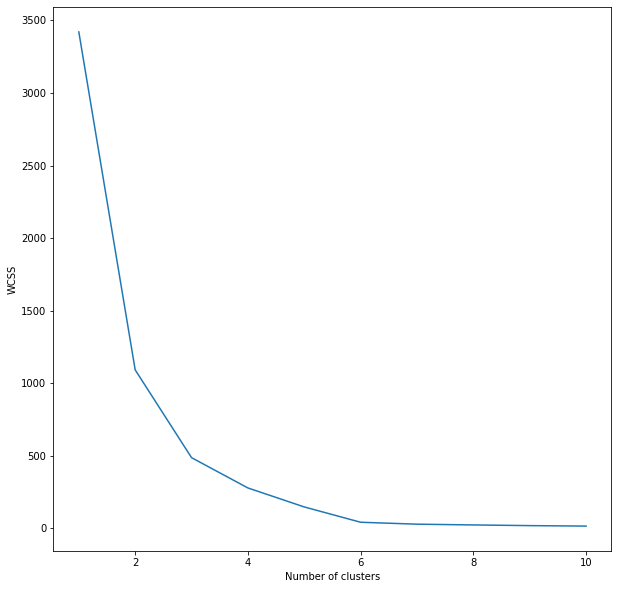

In [126]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(X)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [127]:
# pca = PCA(4)
# data_cluster = pca.fit_transform(X)


In [128]:
# plt.figure(figsize=(10,10))
# var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
# lbls = [str(x) for x in range(1,len(var)+1)]
# plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
# plt.show()

In [129]:
# #centers = np.array(model2.cluster_centers_)
# model = KMeans(n_clusters = 4, init = "k-means++")
# label = model.fit_predict(X)
# plt.figure(figsize=(10,10))
# uniq = np.unique(label)
# # for i in uniq:
# #     plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
# # plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
# # #This is done to find the centroid for each clusters.
# # plt.legend()
# # plt.show()

In [130]:
# train_list

In [131]:
# cluster_list = [label[i] for i in train_list]  
# a = pd.DataFrame(cluster_list)
# b = pd.DataFrame(label)
# a[0].value_counts(), b[0].value_counts(), 

Multilayer Perceptron

In [132]:
from tensorflow import keras
import tensorflow as tf

from tensorflow.python.keras.layers import Input, Dense, Dropout, LSTM, Flatten, RepeatVector, Conv1D, MaxPool1D, MaxPooling1D, BatchNormalization
from tensorflow.python.keras.models import Sequential

from tensorflow.keras.layers.experimental import preprocessing

tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [291]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [446]:
model1 = Sequential()
model1.add(Dense(units = 4, activation="relu")) 
model1.add(Dropout(0.2))
model1.add(Dense(units = 8, activation="relu")) 
model1.add(Dropout(0.2))
model1.add(Dense(units = 16, activation="relu")) 
model1.add(Dropout(0.2))
model1.add(Dense(units = 8, activation="relu"))
model1.add(Dropout(0.1))
#model.add(Flatten())
model1.add(Dense(units = 1, activation="sigmoid"))

In [447]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model1.compile(optimizer = optimizer, loss = keras.losses.BinaryCrossentropy(), metrics = METRICS)
model1.fit(X_train.values, y_train.values, epochs =7, batch_size = 5)
#model1.fit(X.values, Y.values, epochs =12, batch_size = 10)

Train on 4754 samples
Epoch 1/7
4754/4754 [==============================] - 3s 545us/sample - loss: 0.5679 - tp: 18.0000 - fp: 29.0000 - tn: 3447.0000 - fn: 1260.0000 - accuracy: 0.7289 - precision: 0.3830 - recall: 0.0141 - auc: 0.5926 - prc: 0.3129
Epoch 2/7
4754/4754 [==============================] - 1s 264us/sample - loss: 0.5229 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 3476.0000 - fn: 1278.0000 - accuracy: 0.7312 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7040 - prc: 0.4480
Epoch 3/7
4754/4754 [==============================] - 1s 255us/sample - loss: 0.5096 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 3476.0000 - fn: 1278.0000 - accuracy: 0.7312 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7289 - prc: 0.5381
Epoch 4/7
4754/4754 [==============================] - 2s 326us/sample - loss: 0.5027 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 3476.0000 - fn: 1278.0000 - accuracy: 0.7312 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7376 - prc: 0.5486
Epoch 5/7
4754/4

In [448]:
predictions_roll1 = model1.predict(X_valid) 

In [449]:
results = model1.evaluate(X_train, y_train, batch_size=10, verbose=0)
print(results)

[0.489376427755418, 323.0, 0.0, 3476.0, 955.0, 0.79911655, 1.0, 0.25273865, 0.7754263, 0.64075893]


In [465]:
newL = [1 if i > 0.32 else 0 for i in predictions_roll1]

In [451]:
#newL = [1 if i > 0.33 else 0 for i in predictions_roll1]

In [464]:
Score(y_valid, newL) 

0.7352941176470589 0.4205607476635514 0.535077288941736


In [453]:
predictions_roll = model1.predict(X_test) 

In [470]:
predL = [1 if i > 0.32 else 0 for i in predictions_roll]

In [471]:
y_pred_test_corr = predL
print(np.asarray(y_pred_test_corr).sum())

for i in credit_list:
    y_pred_test_corr[i] = 0  

for i in loan_list:
    y_pred_test_corr[i] = 0  

for i in score_list:
    y_pred_test_corr[i] = 1


#(y_test_eclf1 - y_pred_test_corr).sum()

1418


In [472]:
#y_pred_test_sgd

index = pd.Series(range(0, 2500))

predict = y_pred_test_corr#.astype(int)

submission = pd.DataFrame(list(zip(index, predict))  , columns = ['Id', "Credit Default"])

submission.to_csv('C:\gb-credit-default\Credit_default_submission.csv', index = False)